<a href="https://colab.research.google.com/github/DaneshjouLab/LLM_Audits_for_bias/blob/Updated-Graphs/Final_Plots_and_Graphs_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib pandas

In [ ]:
from google.colab import files

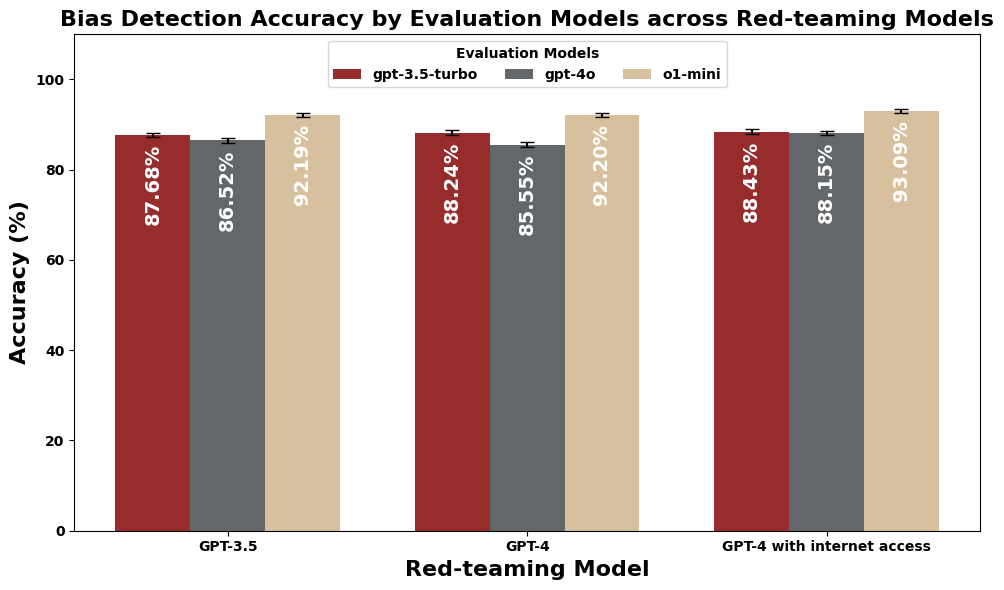

In [ ]:
# @title Question 1 Accuracy
#std err calc (for binomial)
#figure 4 in paper
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data as provided
data = {
    'RTLLM': ['GPT-3.5', 'GPT-3.5', 'GPT-3.5', 'GPT-4', 'GPT-4', 'GPT-4', 'GPT-4 with internet access',
              'GPT-4 with internet access', 'GPT-4 with internet access'],
    'Model': ['gpt-3.5-turbo', 'gpt-4o', 'o1-mini', 'gpt-3.5-turbo', 'gpt-4o', 'o1-mini', 'gpt-3.5-turbo',
              'gpt-4o', 'o1-mini'],
    'TP': [66, 190, 129, 43, 118, 62, 50, 109, 70],
    'TN': [3236, 3014, 3211, 3272, 3056, 3293, 3283, 3171, 3350],
    'FP': [223, 397, 134, 290, 462, 174, 270, 344, 120],
    'FN': [241, 102, 149, 152, 74, 110, 166, 97, 134],
    'Accuracy': [0.876792, 0.865244, 0.921888, 0.882353, 0.855526, 0.921957, 0.884319, 0.881483, 0.930866]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate the total sample count for each row
df['Total'] = df['TP'] + df['TN'] + df['FP'] + df['FN']

# Calculate standard error for each row using the binomial standard error formula
# SE = sqrt(p*(1-p)/n)
df['StdErr'] = np.sqrt(df['Accuracy'] * (1 - df['Accuracy']) / df['Total'])

# Prepare error_data DataFrame with computed standard errors in proportion form
error_data = {
    'Accuracy': df['StdErr'].tolist()
}
df_error = pd.DataFrame(error_data)

# Set positions for bars
rtllms = df['RTLLM'].unique()
models = ['gpt-3.5-turbo', 'gpt-4o', 'o1-mini']

# Prepare accuracy data and error bars per RTLLM group
accuracy_data = []
accuracy_errors = []

for i, rtllm in enumerate(rtllms):
    # Select rows corresponding to the current RTLLM group
    group = df[df['RTLLM'] == rtllm]
    # Convert accuracy to percentage
    accuracies = group['Accuracy'].values * 100
    # Get the computed standard errors and convert to percentage
    errors = df_error.loc[i*3:i*3+2, 'Accuracy'].values * 100
    accuracy_data.append(accuracies)
    accuracy_errors.append(errors)

x_pos = np.arange(len(rtllms))

# Define color palette
color_palette = {
    'gpt-3.5-turbo': '#8C1515',  # Cardinal Red
    'gpt-4o': '#53565A',         # Cool Grey
    'o1-mini': '#D2BA92'         # Sand
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
opacity = 0.9

# Create bars with error bars
for i, model in enumerate(models):
    bars = ax.bar(x_pos + i * bar_width,
                  [accuracy_data[j][i] for j in range(len(rtllms))],
                  bar_width,
                  alpha=opacity,
                  label=model,
                  color=color_palette[model],
                  yerr=[accuracy_errors[j][i] for j in range(len(rtllms))],
                  capsize=5,
                  error_kw={'elinewidth': 1.5})

    # Add percentages inside each bar (rotated and formatted for journal style)
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval - 20, f'{yval:.2f}%',
                ha='center', va='bottom', fontsize=14, fontweight='bold',
                color='white', rotation=90)

# Labels & Title
ax.set_xlabel('Red-teaming Model', fontsize=16, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=16, fontweight='bold')
ax.set_title('Bias Detection Accuracy by Evaluation Models across Red-teaming Models',
             fontsize=16, fontweight='bold')
ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(rtllms)

# Adjust y-axis limit to 110%
ax.set_ylim(0, 110)

# Bold x and y axis labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Adjust layout for the legend
plt.subplots_adjust(top=0.80)
legend = ax.legend(title='Evaluation Models', loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3)
for text in legend.get_texts():
    text.set_fontweight('bold')
legend.get_title().set_fontweight('bold')

plt.tight_layout()
plt.savefig('accuracy_plot.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Uncomment if you want to download the PDF in an appropriate environment
# files.download('accuracy_plot.pdf')


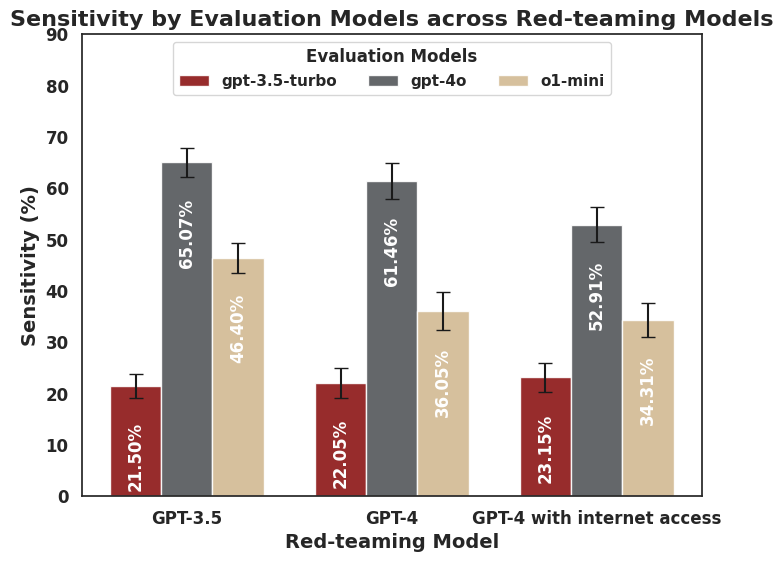

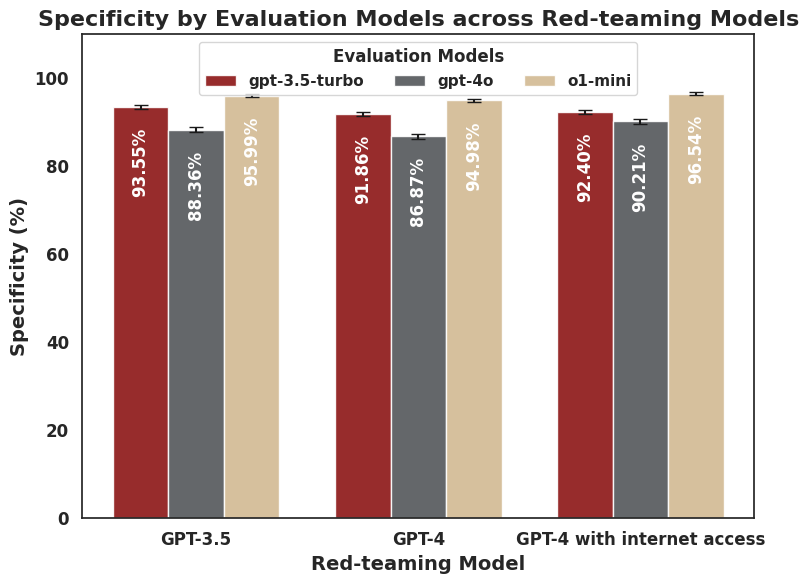

In [ ]:
# @title Question 1 Sensitivity and Specificity
#std err calc (for binomial)
#figure 5 and 6 in paper
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data as provided
data = {
    'RTLLM': ['GPT-3.5', 'GPT-3.5', 'GPT-3.5', 'GPT-4', 'GPT-4', 'GPT-4', 'GPT-4 with internet access',
              'GPT-4 with internet access', 'GPT-4 with internet access'],
    'Model': ['gpt-3.5-turbo', 'gpt-4o', 'o1-mini', 'gpt-3.5-turbo', 'gpt-4o', 'o1-mini', 'gpt-3.5-turbo',
              'gpt-4o', 'o1-mini'],
    'TP': [66, 190, 129, 43, 118, 62, 50, 109, 70],
    'TN': [3236, 3014, 3211, 3272, 3056, 3293, 3283, 3171, 3350],
    'FP': [223, 397, 134, 290, 462, 174, 270, 344, 120],
    'FN': [241, 102, 149, 152, 74, 110, 166, 97, 134],
    'Sensitivity': [0.214984, 0.650685, 0.464029, 0.220513, 0.614583, 0.360465, 0.231481, 0.529126, 0.343137],
    'Specificity': [0.935531, 0.883612, 0.959940, 0.918585, 0.868675, 0.949813, 0.924008, 0.902134, 0.965418]
}

df = pd.DataFrame(data)

# Compute standard errors for Sensitivity and Specificity using the binomial model
# Sensitivity error: n = TP + FN
df['sens_err'] = np.sqrt(df['Sensitivity'] * (1 - df['Sensitivity']) / (df['TP'] + df['FN']))
# Specificity error: n = TN + FP
df['spec_err'] = np.sqrt(df['Specificity'] * (1 - df['Specificity']) / (df['TN'] + df['FP']))

# Set positions for bars
rtllms = df['RTLLM'].unique()
models = ['gpt-3.5-turbo', 'gpt-4o', 'o1-mini']
x_pos = np.arange(len(rtllms))

# Prepare data for plotting (convert proportions to percentages)
sensitivity_data, specificity_data = [], []
sensitivity_errors, specificity_errors = [], []

for i, rtllm in enumerate(rtllms):
    group = df[df['RTLLM'] == rtllm]
    sens_values = group['Sensitivity'].values * 100  # in %
    spec_values = group['Specificity'].values * 100
    sens_errors = group['sens_err'].values * 100       # in %
    spec_errors = group['spec_err'].values * 100

    sensitivity_data.append(sens_values)
    specificity_data.append(spec_values)
    sensitivity_errors.append(sens_errors)
    specificity_errors.append(spec_errors)

# Define color palette for the three evaluation models
color_palette = {
    'gpt-3.5-turbo': '#8C1515',
    'gpt-4o': '#53565A',
    'o1-mini': '#D2BA92'
}

# Function to plot a metric (Sensitivity or Specificity)
def plot_metric(ax, data, errors, metric_name, y_max):
    bar_width = 0.25
    opacity = 0.9

    for i, model in enumerate(models):
        bars = ax.bar(x_pos + i * bar_width,
                      [data[j][i] for j in range(len(rtllms))],
                      bar_width,
                      alpha=opacity,
                      label=model,
                      color=color_palette[model],
                      yerr=[errors[j][i] for j in range(len(rtllms))],
                      capsize=5,
                      error_kw={'elinewidth': 1.5})

        # Add percentage labels inside the bars
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval - 20.5, f'{yval:.2f}%',
                    ha='center', va='bottom', fontsize=12, fontweight='bold',
                    color='white', rotation=90)

    ax.set_xlabel('Red-teaming Model', fontsize=14, fontweight='bold')
    ax.set_ylabel(f'{metric_name} (%)', fontsize=14, fontweight='bold')
    ax.set_title(f'{metric_name} by Evaluation Models across Red-teaming Models', fontsize=16, fontweight='bold')

    ax.set_xticks(x_pos + bar_width)
    ax.set_xticklabels(rtllms, fontsize=12, fontweight='bold')

    # Bold Y-axis tick labels
    ax.tick_params(axis='y', labelsize=12, width=2)
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

    ax.set_ylim(0, y_max)
    ax.yaxis.grid(False)

    # Position the legend inside the plot area
    legend = ax.legend(title='Evaluation Models', loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3)
    legend.get_title().set_fontweight('bold')
    for text in legend.get_texts():
        text.set_fontweight('bold')

# Create the figure for Sensitivity
fig1, ax1 = plt.subplots(figsize=(8, 6))
plot_metric(ax1, sensitivity_data, sensitivity_errors, 'Sensitivity', 90)

# Create the figure for Specificity
fig2, ax2 = plt.subplots(figsize=(8, 6))
plot_metric(ax2, specificity_data, specificity_errors, 'Specificity', 110)

plt.tight_layout()

# Save the figures as high-quality PDFs
fig1.savefig('sensitivity_plot.pdf', dpi=300, bbox_inches='tight')
fig2.savefig('specificity_plot.pdf', dpi=300, bbox_inches='tight')

plt.show()

# Uncomment the following lines if you wish to download the PDFs in your environment
# files.download('sensitivity_plot.pdf')
# files.download('specificity_plot.pdf')


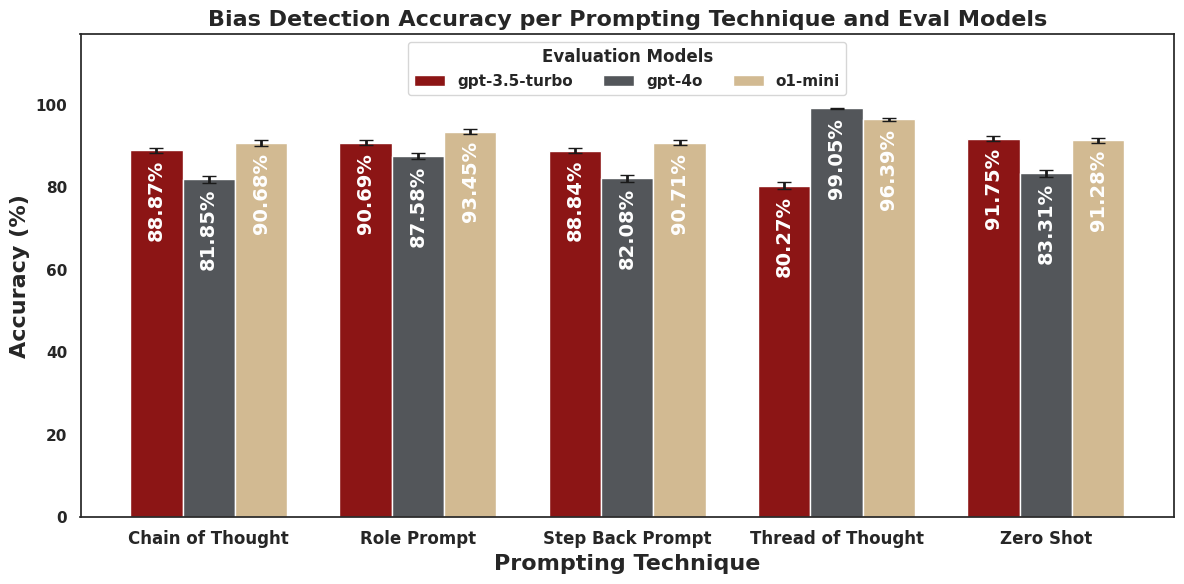

In [ ]:
# @title Question 4 accuracy
#std err calc (for binomial)
#figure 7 in paper
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the data including count values for each case
data = {
    'Model': ['gpt-3.5-turbo']*5 + ['gpt-4o']*5 + ['o1-mini']*5,
    'Prompt Technique': ['Chain of Thought', 'Role Prompt', 'Step Back Prompt', 'Thread of Thought', 'Zero Shot']*3,
    'TP': [8, 2, 8, 136, 5,
           89, 44, 94, 135, 55,
           39, 39, 39, 111, 33],
    'TN': [2005, 2053, 2007, 1650, 2076,
           1737, 1909, 1734, 2049, 1812,
           1956, 2016, 1952, 1974, 1956],
    'FP': [115, 70, 117, 433, 48,
           357, 180, 356, 21, 289,
           111, 51, 111, 62, 93],
    'FN': [137, 141, 136, 6, 139,
           48, 97, 43, 0, 85,
           94, 93, 93, 16, 97],
    'Accuracy': [0.888742, 0.906884, 0.888448, 0.802697, 0.917549,
                 0.818467, 0.875785, 0.820835, 0.990476, 0.833110,
                 0.906818, 0.934516, 0.907062, 0.963939, 0.912804]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate total number of observations per row
df['Total'] = df['TP'] + df['TN'] + df['FP'] + df['FN']

# Compute standard error for Accuracy using the binomial formula:
# SE = sqrt( p * (1 - p) / n )
df['Accuracy_SE'] = np.sqrt(df['Accuracy'] * (1 - df['Accuracy']) / df['Total'])

# Set Seaborn style
sns.set(style="white")

# Define colors for each model
colors = {'gpt-3.5-turbo': '#8C1515', 'gpt-4o': '#53565A', 'o1-mini': '#D2BA92'}

# Set figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Set bar width and positions
bar_width = 0.25
x_labels = df['Prompt Technique'].unique()
x = np.arange(len(x_labels))

# Loop through models and create bars with computed error bars
for i, model in enumerate(df['Model'].unique()):
    # Sort data to ensure the prompt techniques are in the same order
    model_data = df[df['Model'] == model].sort_values('Prompt Technique')
    bars = ax.bar(x + i * bar_width,
                  model_data['Accuracy'] * 100,  # Convert to percentage
                  width=bar_width,
                  color=colors[model],
                  label=model,
                  yerr=model_data['Accuracy_SE'] * 100,  # Convert error to percentage points
                  capsize=5,
                  error_kw={'elinewidth': 2, 'capsize': 5})

    # Add value labels inside bars
    for bar, v in zip(bars, model_data['Accuracy']):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 22,
                f"{v * 100:.2f}%", ha='center', va='bottom',
                fontsize=14, color='white', rotation=90, fontweight='bold')

# Set labels and title
ax.set_xlabel('Prompting Technique', fontsize=16, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=16, fontweight='bold')
ax.set_title('Bias Detection Accuracy per Prompting Technique and Eval Models', fontsize=16, fontweight='bold')

# Set x-axis tick labels
ax.set_xticks(x + bar_width)
ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=12, fontweight='bold')

# Bold y-axis tick labels
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Adjust y-axis limit to allow space above the bars
ax.set_ylim(0, 117)

# Create legend inside the plot area
legend = ax.legend(title='Evaluation Models', loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3)
legend.get_title().set_fontweight('bold')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Adjust layout to give more space above for the legend
plt.subplots_adjust(top=0.80)
plt.tight_layout()

# Save the figure as a high-quality PDF
plt.savefig('accuracy_with_error_bars_updated.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Uncomment the following line if your environment supports file downloads:
# files.download('accuracy_with_error_bars_updated.pdf')


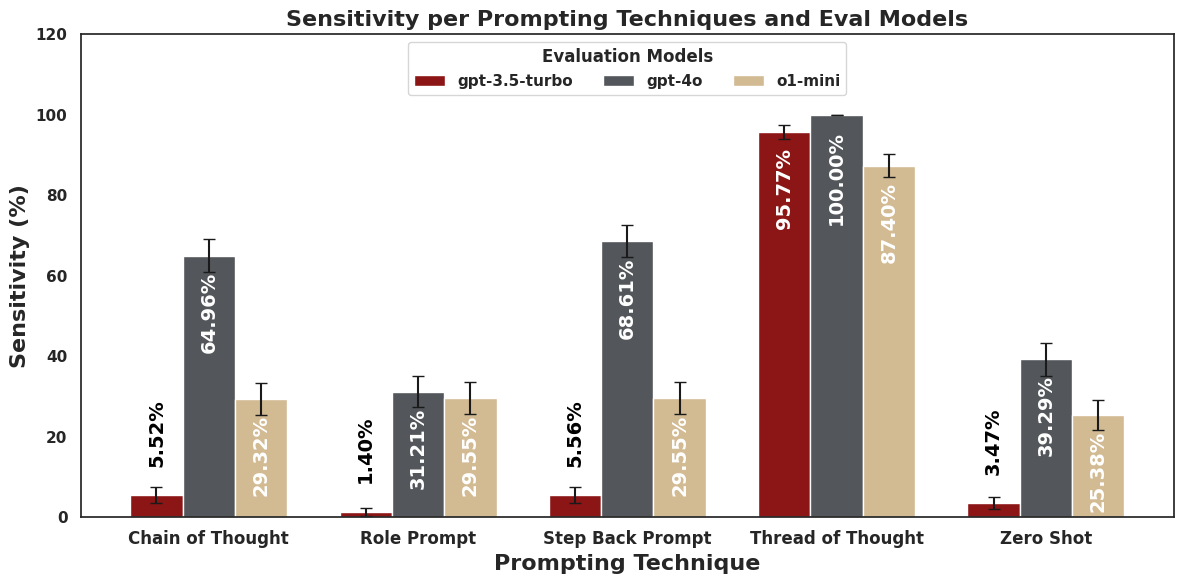

In [ ]:
# @title Question 4 Sensitivity
#std err calc (for binomial)
#figure 8 in paper
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the data including counts for computing sensitivity error
data = {
    'Model': ['gpt-3.5-turbo'] * 5 + ['gpt-4o'] * 5 + ['o1-mini'] * 5,
    'Prompt Technique': ['Chain of Thought', 'Role Prompt', 'Step Back Prompt', 'Thread of Thought', 'Zero Shot'] * 3,
    'Sensitivity': [0.055172, 0.013986, 0.055556, 0.957746, 0.034722,
                    0.649635, 0.312057, 0.686131, 1.000000, 0.392857,
                    0.293233, 0.295455, 0.295455, 0.874016, 0.253846],
    'TP': [8, 2, 8, 136, 5,
           89, 44, 94, 135, 55,
           39, 39, 39, 111, 33],
    'FN': [137, 141, 136, 6, 139,
           48, 97, 43, 0, 85,
           94, 93, 93, 16, 97]
}

# Create DataFrame
df = pd.DataFrame(data)

# For sensitivity, n is the total number of positives: TP + FN
df['Positives'] = df['TP'] + df['FN']

# Compute the standard error for sensitivity using the binomial formula:
# SE = sqrt( p * (1 - p) / (TP + FN) )
df['Sensitivity_SE'] = np.sqrt(df['Sensitivity'] * (1 - df['Sensitivity']) / df['Positives'])

# Set Seaborn style
sns.set(style="white")

# Define colors for each model
colors = {'gpt-3.5-turbo': '#8C1515', 'gpt-4o': '#53565A', 'o1-mini': '#D2BA92'}

# Set figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Set bar width and positions
bar_width = 0.25
x_labels = df['Prompt Technique'].unique()
x = np.arange(len(x_labels))

# Loop through models and create bars with computed error bars
for i, model in enumerate(df['Model'].unique()):
    model_data = df[df['Model'] == model]

    # Create bars with error bars computed from the binomial standard error
    bars = ax.bar(x + i * bar_width,
                  model_data['Sensitivity'] * 100,
                  width=bar_width,
                  color=colors[model],
                  label=model,
                  yerr=model_data['Sensitivity_SE'] * 100,  # converting to percentage points
                  capsize=4)

    # Add value labels inside or above bars based on the value
    for bar, v in zip(bars, model_data['Sensitivity']):
        # Adjust label positioning based on the percentage value
        if v * 100 < 6:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 7, f"{v*100:.2f}%",
                    ha='center', va='bottom', fontsize=14, color='black', rotation=90, fontweight='bold')
        elif v * 100 < 10:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{v*100:.2f}%",
                    ha='center', va='bottom', fontsize=14, color='white', rotation=90, fontweight='bold')
        else:
            # For 100% (or near-perfect sensitivity), label just inside the top edge
            if v == 1.000000:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 4, f"{v*100:.2f}%",
                        ha='center', va='top', fontsize=14, color='white', rotation=90, fontweight='bold')
            else:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 4, f"{v*100:.2f}%",
                        ha='center', va='top', fontsize=14, color='white', rotation=90, fontweight='bold')

# Labels and title
ax.set_xlabel('Prompting Technique', fontsize=16, fontweight='bold')
ax.set_ylabel('Sensitivity (%)', fontsize=16, fontweight='bold')
ax.set_title('Sensitivity per Prompting Techniques and Eval Models', fontsize=16, fontweight='bold')

# Set x-axis tick labels
ax.set_xticks(x + bar_width)
ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=12, fontweight='bold')

# Bold y-axis tick labels
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Adjust y-axis limit
ax.set_ylim(0, 120)

# Create legend inside the plot
legend = ax.legend(title='Evaluation Models', loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3)
legend.get_title().set_fontweight('bold')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Adjust layout for the legend space and overall plot
plt.subplots_adjust(top=0.80)
plt.tight_layout()

# Save the figure as a PDF file with 300 DPI
plt.savefig('sensitivity_plot_updated.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Uncomment the line below if your environment supports file downloads
# files.download('sensitivity_plot_updated.pdf')


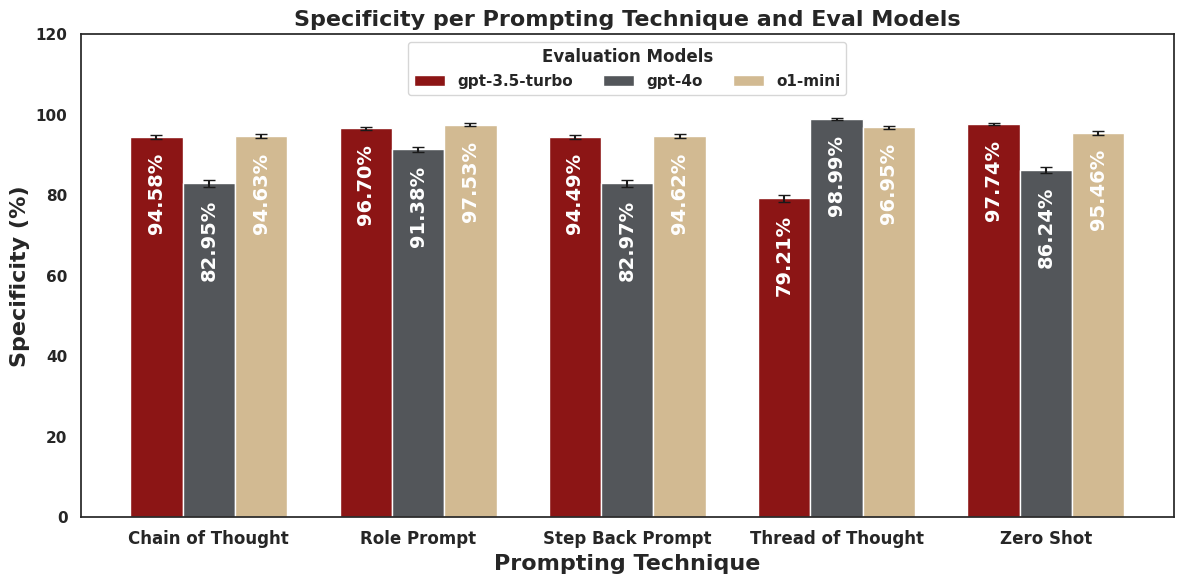

In [ ]:
# @title Question 4
#std err calc (for binomial)
#figure 9 in paper
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the data including the counts needed for computing specificity error
data = {
    'Model': ['gpt-3.5-turbo'] * 5 + ['gpt-4o'] * 5 + ['o1-mini'] * 5,
    'Prompt Technique': ['Chain of Thought', 'Role Prompt', 'Step Back Prompt', 'Thread of Thought', 'Zero Shot'] * 3,
    'Specificity': [0.945755, 0.967028, 0.944915, 0.792127, 0.977401,
                    0.829513, 0.913834, 0.829665, 0.989855, 0.862446,
                    0.946299, 0.975327, 0.946195, 0.969548, 0.954612],
    # TN and FP for each row:
    'TN': [2005, 2053, 2007, 1650, 2076,   # gpt-3.5-turbo
           1737, 1909, 1734, 2049, 1812,   # gpt-4o
           1956, 2016, 1952, 1974, 1956],  # o1-mini
    'FP': [115, 70, 117, 433, 48,          # gpt-3.5-turbo
           357, 180, 356, 21, 289,         # gpt-4o
           111, 51, 111, 62, 93]           # o1-mini
}

# Create DataFrame
df = pd.DataFrame(data)

# Compute the total number of negatives for each row
df['Negatives'] = df['TN'] + df['FP']

# Compute the binomial standard error for specificity:
# SE = sqrt( p * (1-p) / (TN+FP) )
df['Specificity_SE'] = np.sqrt(df['Specificity'] * (1 - df['Specificity']) / df['Negatives'])

# Set Seaborn style
sns.set(style="white")

# Define colors for each model
colors = {'gpt-3.5-turbo': '#8C1515', 'gpt-4o': '#53565A', 'o1-mini': '#D2BA92'}

# Set figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Set bar width and positions
bar_width = 0.25
x_labels = df['Prompt Technique'].unique()
x = np.arange(len(x_labels))

# Loop through models and create bars with computed error bars
for i, model in enumerate(df['Model'].unique()):
    model_data = df[df['Model'] == model]

    bars = ax.bar(x + i * bar_width,
                  model_data['Specificity'] * 100,  # convert to percentage
                  width=bar_width,
                  color=colors[model],
                  label=model,
                  yerr=model_data['Specificity_SE'] * 100,  # error in percentage points
                  capsize=4)

    # Add value labels inside or above bars
    for bar, v in zip(bars, model_data['Specificity']):
        # For very low values, place the label above the bar; otherwise, inside near the top edge
        if v * 100 < 5:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{v*100:.2f}%",
                    ha='center', va='bottom', fontsize=14, color='white', rotation=90, fontweight='bold')
        else:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 4, f"{v*100:.2f}%",
                    ha='center', va='top', fontsize=14, color='white', rotation=90, fontweight='bold')

# Set labels and title
ax.set_xlabel('Prompting Technique', fontsize=16, fontweight='bold')
ax.set_ylabel('Specificity (%)', fontsize=16, fontweight='bold')
ax.set_title('Specificity per Prompting Technique and Eval Models', fontsize=16, fontweight='bold')

# Set x-axis labels to be horizontal
ax.set_xticks(x + bar_width)
ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=12, fontweight='bold')

# Bold y-axis tick labels
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Adjust y-axis limit to 120%
ax.set_ylim(0, 120)

# Create legend inside the plot
legend = ax.legend(title='Evaluation Models', loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3)
legend.get_title().set_fontweight('bold')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Adjust layout to give more space above for the legend
plt.subplots_adjust(top=0.80)
plt.tight_layout()

# Save the figure as a PDF file with 300 dpi
plt.savefig('specificity_plot_with_error_bars_updated.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Uncomment the following line if your environment supports file downloads:
# files.download('specificity_plot_with_error_bars_updated.pdf')
